In [1]:
using PyCall
using PyPlot
plt = pyimport("matplotlib.pyplot")
np = pyimport("numpy")
xr = pyimport("xarray")
plot = pyimport("proplot")

PyObject <module 'proplot' from '/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/proplot/__init__.py'>

In [2]:
ds = xr.open_dataset("/home/lalandmi/Dropbox/data/CRU/tmp/cru_ts4.04.1901.2019.tmp.dat.nc")

PyObject <xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 1428)
Coordinates:
  * lon      (lon) float32 -179.75 -179.25 -178.75 ... 178.75 179.25 179.75
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2019-12-16
Data variables:
    tmp      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.04 Mean Temperature
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2004151855. Data generated from:tmp.2004011744.dtb
    history:      Wed 15 Apr 2020 19:58:33 BST : User ianharris : Program mak...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

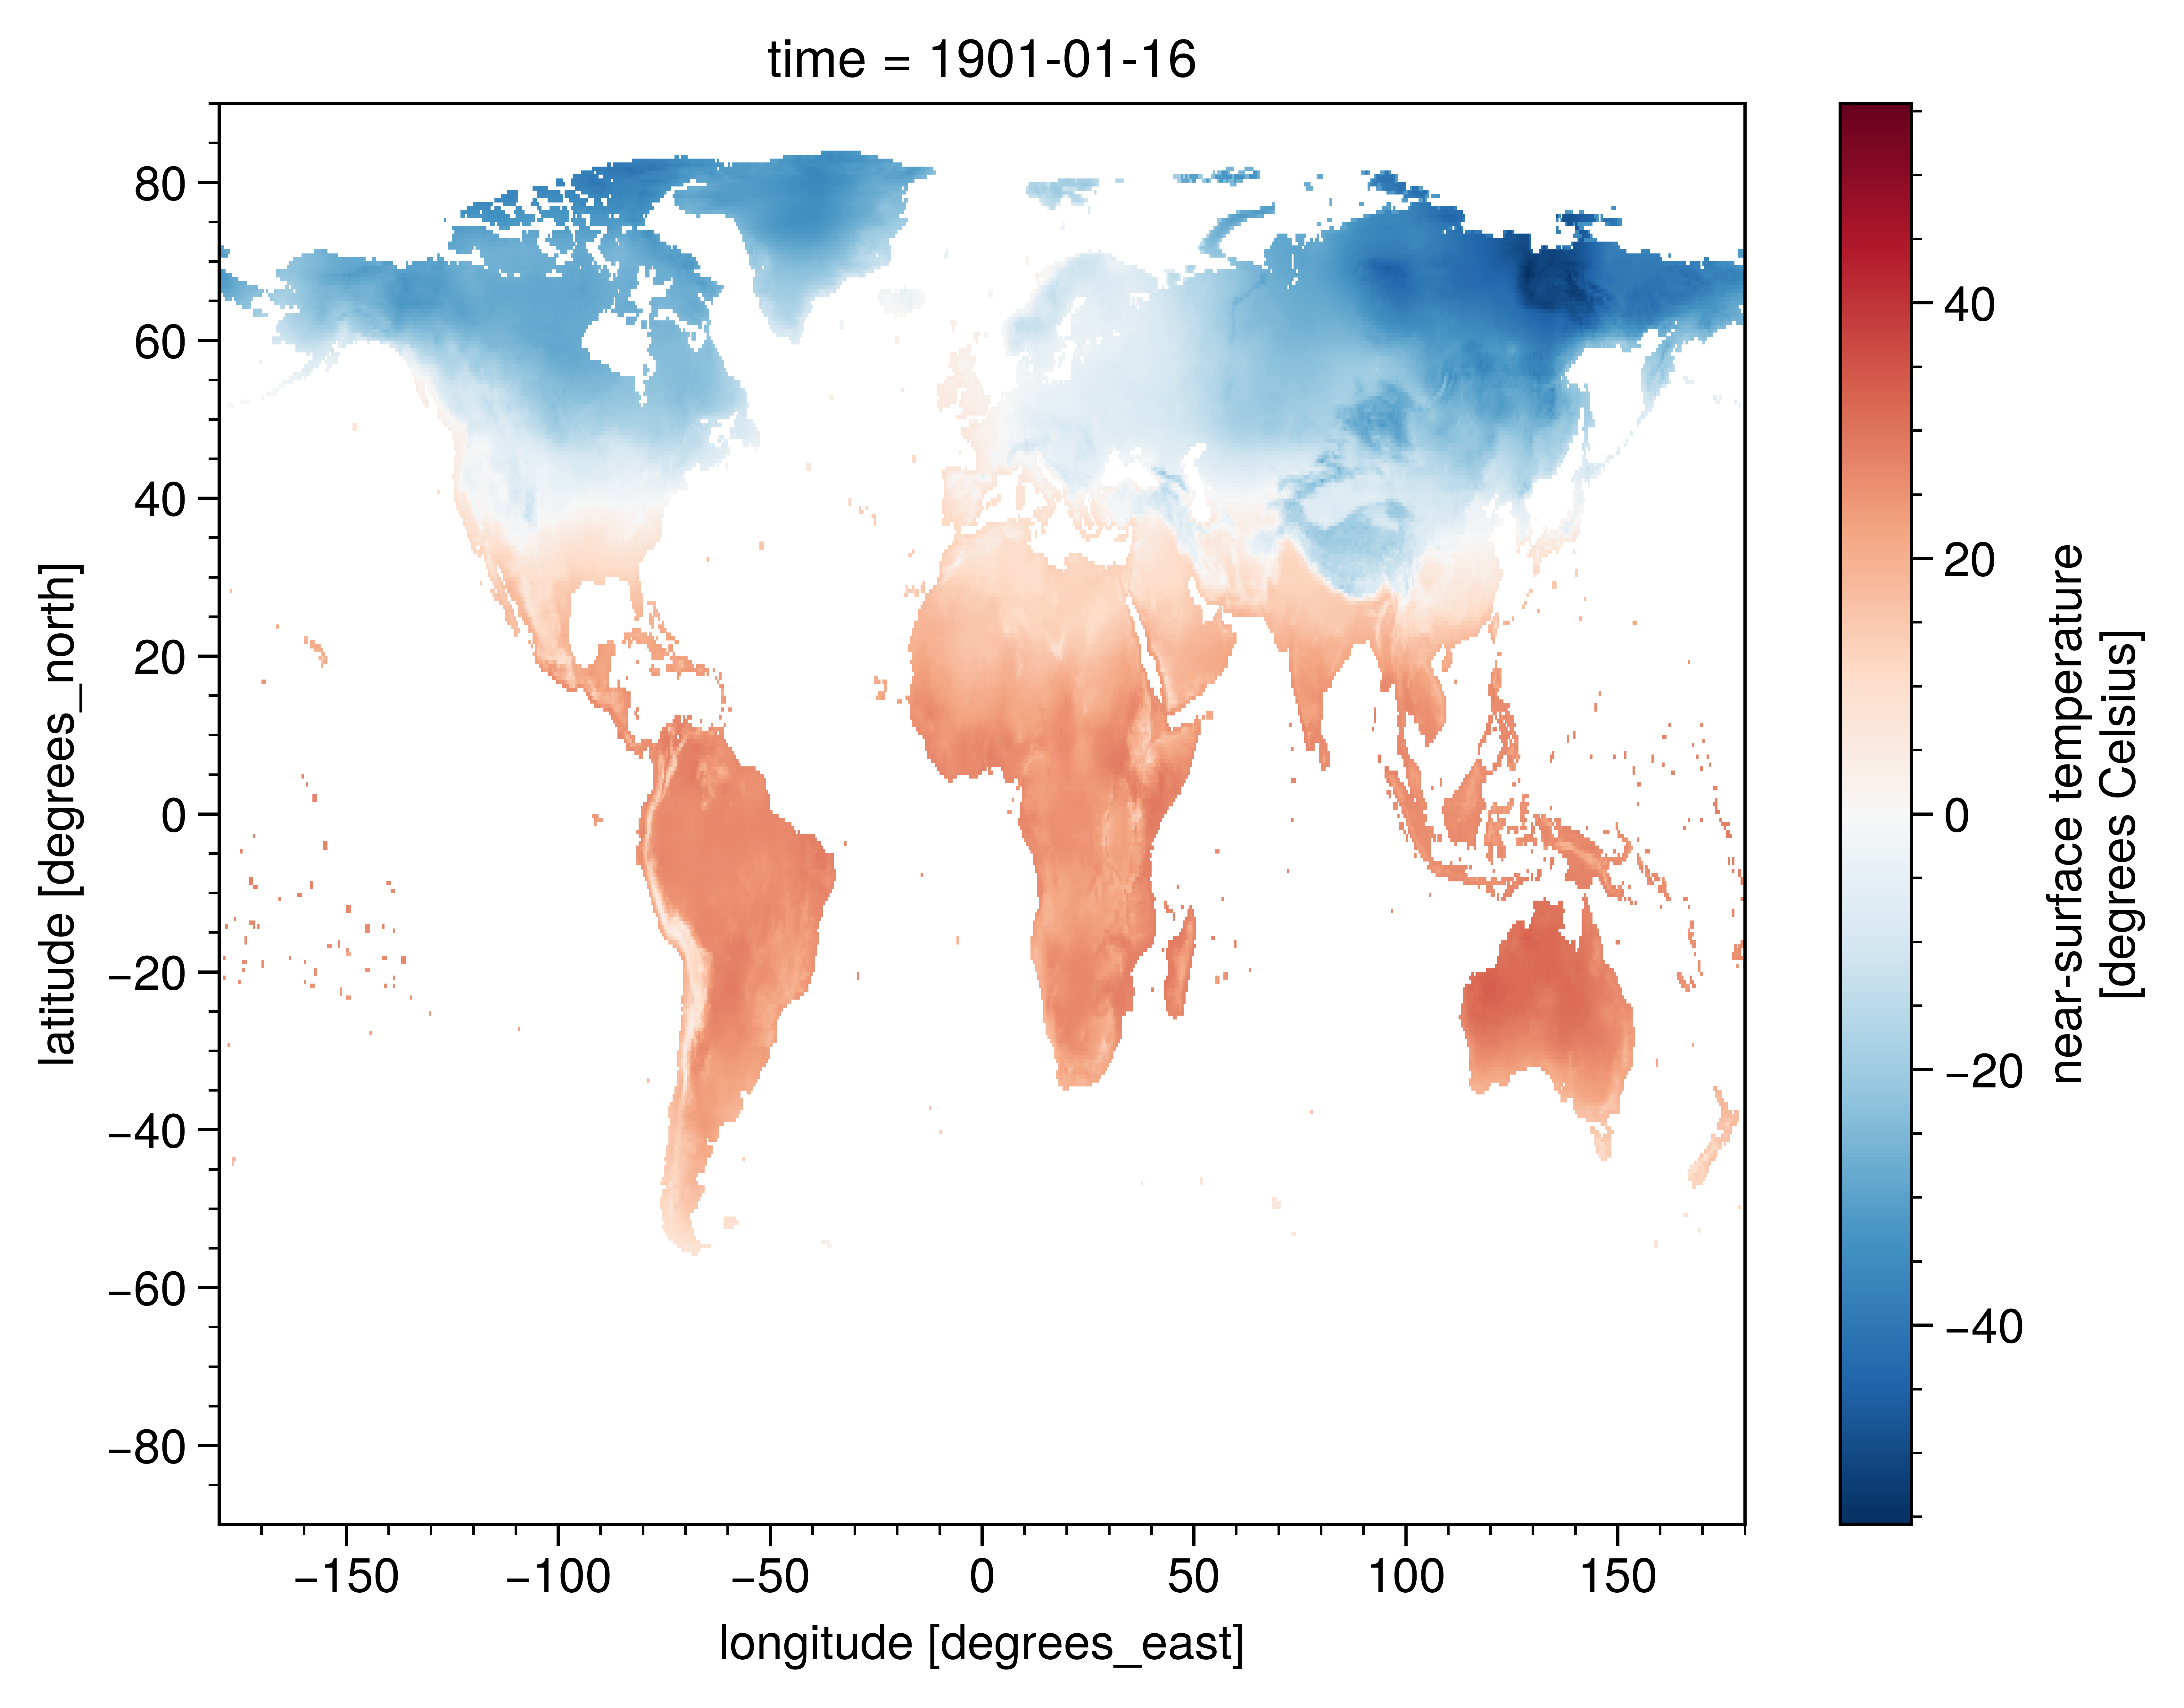

PyObject <matplotlib.collections.QuadMesh object at 0x14994a3504f0>

In [10]:
ds.tmp[1].plot()

In [15]:
ds.tmp.sel(time="2004")

PyObject <xarray.DataArray 'tmp' (time: 12, lat: 360, lon: 720)>
[3110400 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 -179.75 -179.25 -178.75 ... 178.75 179.25 179.75
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 2004-01-16 2004-02-15 ... 2004-12-16
Attributes:
    long_name:                   near-surface temperature
    units:                       degrees Celsius
    correlation_decay_distance:  1200.0

In [13]:
ds.tmp.sel(lat=slice(0,50))

LoadError: UndefVarError: slice not defined

In [14]:
period = 2000:1:2014
ds.tmp.sel(time=period)

LoadError: PyError ($(Expr(:escape, :(ccall(#= /home/lalandmi/.julia/packages/PyCall/7a7w0/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'KeyError'>
KeyError("not all values found in index 'time'")
  File "/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/dataarray.py", line 1149, in sel
    ds = self._to_temp_dataset().sel(
  File "/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/dataset.py", line 2101, in sel
    pos_indexers, new_indexes = remap_label_indexers(
  File "/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/coordinates.py", line 396, in remap_label_indexers
    pos_indexers, new_indexes = indexing.remap_label_indexers(
  File "/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/indexing.py", line 270, in remap_label_indexers
    idxr, new_idx = convert_label_indexer(index, label, dim, method, tolerance)
  File "/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/indexing.py", line 202, in convert_label_indexer
    raise KeyError(f"not all values found in index {index_name!r}")


In [11]:
ds.tmp.sel(time=slice("2000","2014"))

LoadError: UndefVarError: slice not defined

In [8]:
clim = ds.tmp.mean("time")

PyObject <xarray.DataArray 'tmp' (lat: 360, lon: 720)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -179.75 -179.25 -178.75 ... 178.75 179.25 179.75
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75

In [9]:
clim.plot()

PyObject <matplotlib.collections.QuadMesh object at 0x14e77acc1af0>

In [17]:
@time begin
    a = 1
end

  0.000001 seconds


1

In [11]:
fig, axs = plot.subplots(proj="cyl", axwidth=4)

axs[1].contourf(clim)

# axs.format(
#     labels=True, coast=True, borders=True,
#     suptitle='France annual climatology ERA5 (1979-2020)'
# )

PyObject <matplotlib.contour.QuadContourSet object at 0x14e61d7a4520>